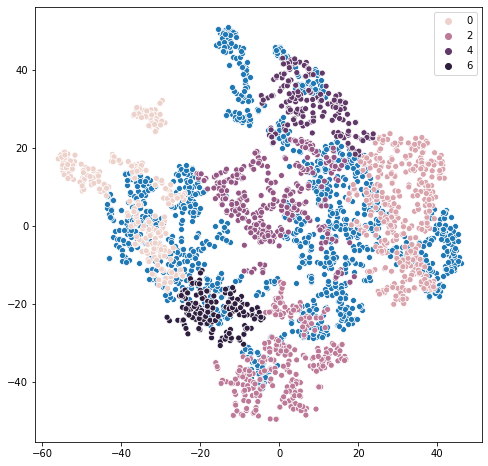

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import boxcox_normmax
from scipy.special import boxcox1p
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.preprocessing import RobustScaler
from category_encoders.target_encoder import TargetEncoder
from category_encoders.backward_difference import BackwardDifferenceEncoder
from category_encoders.ordinal import OrdinalEncoder
from random import randint
from category_encoders.ordinal import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)
test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1, inplace=True)
data['FireplaceQu'].fillna('No pool',inplace=True)
test['FireplaceQu'].fillna('No pool',inplace=True)
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)
test['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)
data.dropna(inplace=True)
test.fillna(value = 0,inplace=True)
data_new = data.drop(['Utilities','LandSlope','Condition1','Condition2','BldgType','Street','RoofMatl','ExterCond','BsmtCond',\
'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','MSZoning','SaleType','SaleCondition',\
                     'LandContour','BsmtFinType2'],axis=1)
test = test.drop(['Utilities','LandSlope','Condition1','Condition2','BldgType','Street','RoofMatl','ExterCond','BsmtCond',\
'Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','MSZoning','SaleType','SaleCondition',\
                     'LandContour','BsmtFinType2'],axis=1)

data_new.drop(['TotalBsmtSF','GarageCars','GarageYrBlt','TotRmsAbvGrd'],axis=1,inplace=True)
test.drop(['TotalBsmtSF','GarageCars','GarageYrBlt','TotRmsAbvGrd'],axis=1,inplace=True)

numer = set(data_new.corr()['SalePrice'].index)
categ = list(set(data_new.columns) - set(data_new.corr()['SalePrice'].index))
data_new = data_new[data_new['SalePrice']<350000]
target_val = data_new['SalePrice'].values
data_targ = data_new.copy()
for i in categ:
    data_targ[i] = data_targ[i].factorize()[0]
data_targ.head(3)






data_targ2 = test.copy()
for i in categ:
    data_targ2[i] = data_targ2[i].factorize()[0]
data_targ2.head(3)

from sklearn import preprocessing
from sklearn.preprocessing import Normalizer,MinMaxScaler, RobustScaler
data_targ.drop(['SalePrice'],axis=1,inplace=True)
nrm = Normalizer()
nrm.fit(data_targ)
normal_data = nrm.transform(data_targ)
normal_data_test = nrm.transform(data_targ2)
from sklearn.manifold import TSNE
tsn = TSNE(random_state=20)
res_tsne = tsn.fit_transform(normal_data)
res_tsne_test = tsn.fit_transform(normal_data_test)
plt.figure(figsize=(8,8))
sns.scatterplot(res_tsne[:,0],res_tsne[:,1])
cl = AgglomerativeClustering(n_clusters = 6)
cl.fit(res_tsne)
#sns.scatterplot(res_tsne[:,0],res_tsne[:,1],hue = cl.labels_);
cl.fit_predict(res_tsne_test)
sns.scatterplot(res_tsne_test[:,0],res_tsne_test[:,1],hue = cl.labels_);

